### Filtering data to DACH region + PL + CZ

In [1]:
import pandas as pd
import os

# === Configuration ===
COUNTRIES = ["DE", "AT", "CH", "PL", "CZ"]
DATA_DIR = "data"

# === Process Data ===
def process_data(indicator: str):
    # Load the CSV file
    file_path = os.path.join(DATA_DIR, f"{indicator}_1.0.csv")
    df = pd.read_csv(file_path, delimiter=",")  # Adjust delimiter for Eurostat CSV format
        # Check the column names
    print("Columns in the dataset:", df.columns)

    # Filter the data by countries
    df_filtered = df[df['geo'].isin(COUNTRIES)]
    
    # Save the filtered data to a new CSV file
    filtered_file_path = os.path.join(DATA_DIR, f"{indicator}_filtered.csv")
    df_filtered.to_csv(filtered_file_path, index=False)
    print(f"Filtered data saved to {filtered_file_path}")

# === Main Execution ===
process_data("prc_hicp_manr")  # For HICP (Inflation Index)

/var/folders/qg/h5cz5sy52r1gxqclgdb456jc0000gn/T/ipykernel_49146/2144267792.py:12: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=",")  # Adjust delimiter for Eurostat CSV format


Columns in the dataset: Index(['STRUCTURE', 'STRUCTURE_ID', 'STRUCTURE_NAME', 'freq', 'Time frequency',
       'unit', 'Unit of measure', 'coicop',
       'Classification of individual consumption by purpose (COICOP)', 'geo',
       'Geopolitical entity (reporting)', 'TIME_PERIOD', 'Time', 'OBS_VALUE',
       'Observation value', 'OBS_FLAG',
       'Observation status (Flag) V2 structure', 'CONF_STATUS',
       'Confidentiality status (flag)'],
      dtype='object')
Filtered data saved to data/prc_hicp_manr_filtered.csv


### Checking data structure

In [2]:
import pandas as pd

# Assign the filtered data to variables
cpi_data = pd.read_csv('data/prc_hicp_manr_filtered.csv')  # HICP (Inflation Index)

# Selecting first 5 rows of each dataset for display
print(cpi_data.head())

  STRUCTURE              STRUCTURE_ID  \
0  dataflow  ESTAT:PRC_HICP_MANR(1.0)   
1  dataflow  ESTAT:PRC_HICP_MANR(1.0)   
2  dataflow  ESTAT:PRC_HICP_MANR(1.0)   
3  dataflow  ESTAT:PRC_HICP_MANR(1.0)   
4  dataflow  ESTAT:PRC_HICP_MANR(1.0)   

                                STRUCTURE_NAME freq Time frequency   unit  \
0  HICP - monthly data (annual rate of change)    M        Monthly  RCH_A   
1  HICP - monthly data (annual rate of change)    M        Monthly  RCH_A   
2  HICP - monthly data (annual rate of change)    M        Monthly  RCH_A   
3  HICP - monthly data (annual rate of change)    M        Monthly  RCH_A   
4  HICP - monthly data (annual rate of change)    M        Monthly  RCH_A   

         Unit of measure coicop  \
0  Annual rate of change     AP   
1  Annual rate of change     AP   
2  Annual rate of change     AP   
3  Annual rate of change     AP   
4  Annual rate of change     AP   

  Classification of individual consumption by purpose (COICOP) geo  \
0        

/var/folders/qg/h5cz5sy52r1gxqclgdb456jc0000gn/T/ipykernel_49146/3784200911.py:4: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  cpi_data = pd.read_csv('data/prc_hicp_manr_filtered.csv')  # HICP (Inflation Index)


## Plotting HICP Inflation (Smoothed, 3-month avg) for DACH, PL & CZ - Full Overview

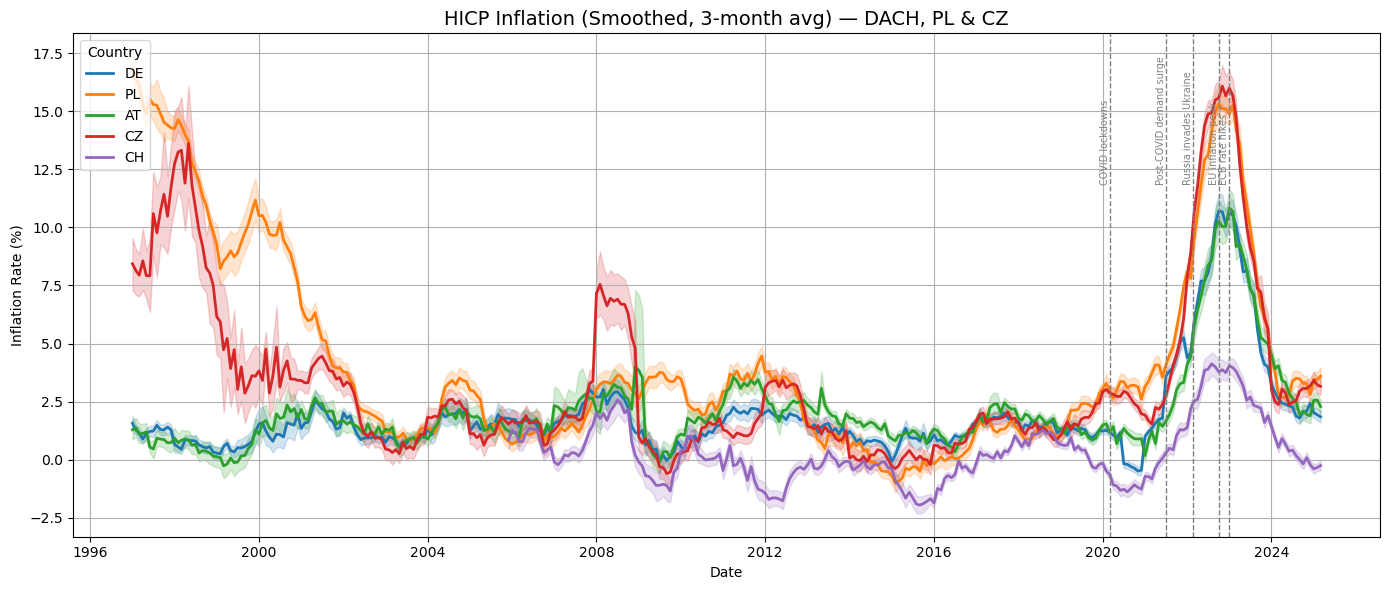

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert TIME_PERIOD to datetime
cpi_data['date'] = pd.to_datetime(cpi_data['TIME_PERIOD'])
cpi_data_sorted = cpi_data.sort_values('date')

# Rolling average per country (3-month window)
cpi_data_sorted['rolling_avg'] = cpi_data_sorted.groupby('geo')['OBS_VALUE']\
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=cpi_data_sorted, x='date', y='rolling_avg', hue='geo', linewidth=2)

# Title and axis labels
plt.title('HICP Inflation (Smoothed, 3-month avg) — DACH, PL & CZ', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Annotated events
annotations = {
    '2020-03-01': 'COVID lockdowns',
    '2021-07-01': 'Post-COVID demand surge',
    '2022-02-24': 'Russia invades Ukraine',
    # '2022-03-01': 'Energy crisis starts',
    '2022-10-01': 'EU inflation peak',
    '2023-01-01': 'ECB rate hikes'
}

for date_str, label in annotations.items():
    date = pd.to_datetime(date_str)
    plt.axvline(date, color='gray', linestyle='--', linewidth=1)
    plt.text(date, plt.ylim()[1]*0.65, label, rotation=90, color='gray', fontsize=7, ha='right',snap=True)

plt.tight_layout()

# Save the plot
plt.savefig('img/HICP_Inflation_Full_Overview.png',transparent=None, dpi=300, facecolor='auto', edgecolor='auto', backend=None, bbox_inches='tight')

plt.show()

## HICP Inflation (Smoothed, 3-month avg) for DACH, PL & CZ - Overview from 2019 till now

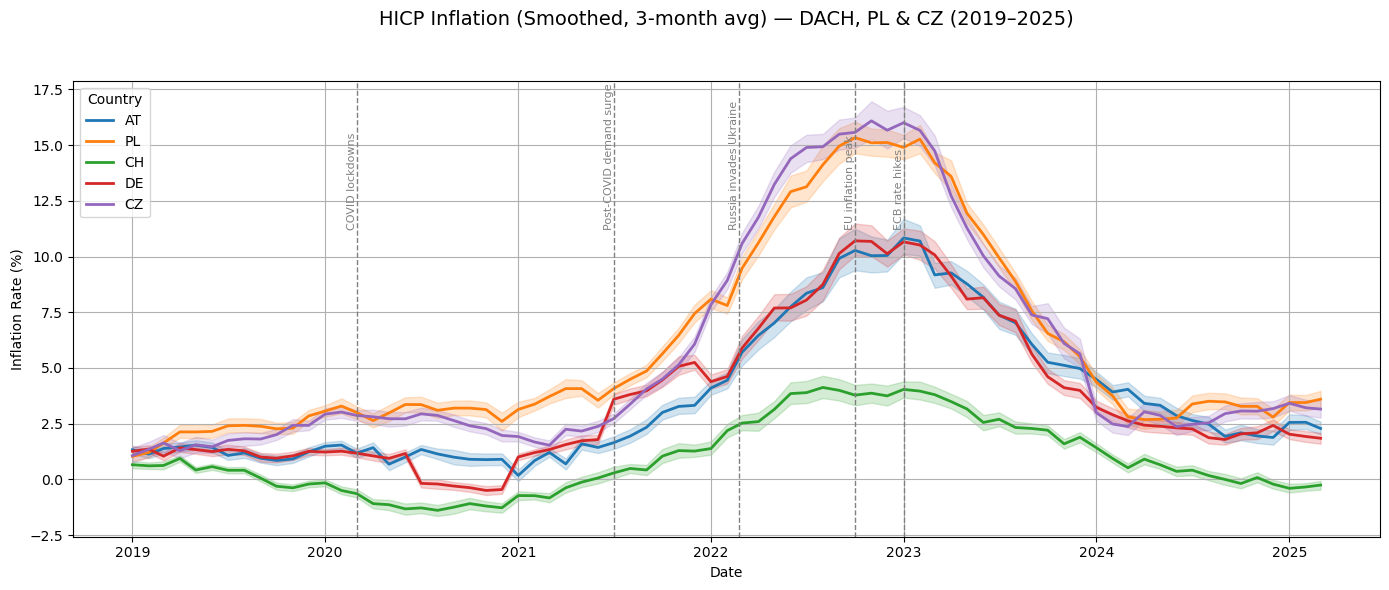

In [4]:

# Filter only data from 2019 onward
cpi_data_filtered = cpi_data_sorted[cpi_data_sorted['date'] >= '2019-01-01'].copy()

# Apply rolling average per country
cpi_data_filtered['rolling_avg'] = cpi_data_filtered.groupby('geo')['OBS_VALUE']\
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=cpi_data_filtered, x='date', y='rolling_avg', hue='geo', linewidth=2)

# Title and labels
plt.title('HICP Inflation (Smoothed, 3-month avg) — DACH, PL & CZ (2019–2025)', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Inflation Rate (%)')
plt.grid(True)
plt.legend(title='Country', loc='upper left')

# Annotated events
annotations = {
    '2020-03-01': 'COVID lockdowns',
    '2021-07-01': 'Post-COVID demand surge',
    '2022-02-24': 'Russia invades Ukraine',
    # '2022-03-01': 'Energy crisis starts',
    '2022-10-01': 'EU inflation peak',
    '2023-01-01': 'ECB rate hikes'
}

for date_str, label in annotations.items():
    date = pd.to_datetime(date_str)
    if date >= pd.to_datetime('2019-01-01'):
        plt.axvline(date, color='gray', linestyle='--', linewidth=1)
        plt.text(date, plt.ylim()[1]*0.63, label, rotation=90, color='gray', fontsize=8, ha='right',snap=True)

# Push the title slightly higher for better readability
plt.title('HICP Inflation (Smoothed, 3-month avg) — DACH, PL & CZ (2019–2025)', fontsize=14, pad=40)

plt.tight_layout()

# Save the plot
plt.savefig('img/HICP_Inflation_2019-2025.png',transparent=None, dpi=300, facecolor='auto', edgecolor='auto', backend=None, bbox_inches='tight')

plt.show()